In [5]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from scipy.special import legendre, factorial,eval_legendre
from pandas import *
from scipy.optimize import fsolve
from scipy.special import hankel2
from sympy import init_printing, evalf, S,lambdify
from scipy.integrate import quad, odeint
from mpmath import findroot
init_printing()
%matplotlib notebook

In [2]:
m=40.
EI=20
dd=0
#Kξ=24
#Kα=96
Kα,Kξ=sp.symbols('Kα,Kξ')
x=np.poly1d([1,0])
Sα=quad(m*(x-dd),-1, 1)[0]
Iα=quad(m*(x-dd)**2,-1, 1)[0]
#b=0.5

In [3]:
tol=1e-10
n = int(input(""))
n=n+1
nn=n
if n%2!=0:
    n=n+1
    nn=n-1
    

l=[legendre(i) for i in range(n)]
for k in range(n):
    for kk in range(n):
        if np.abs(l[k][kk])<tol:
            l[k][kk]=0
lp=l[2:n:2]
li=l[3:n:2]

t=[0 for i in range(n)]
t[0]=np.poly1d([1.])
t[1]=np.poly1d([1., 0.])
for i in range(2,n):
    t[i]=2*t[1]*t[i-1]-t[i-2]
tp=t[0:n:2]
ti=t[1:n:2]
x = sp.Symbol("x")
x1 = sp.Symbol("x1")
x2 = sp.Symbol("x2")
x3=  sp.Symbol("x3")
x4 = sp.Symbol("x4")
x5 = sp.Symbol("x5")
x6 = sp.Symbol("x6")
x7=  sp.Symbol("x7")
x8 = sp.Symbol("x8")
x9 = sp.Symbol("x9")
x10 = sp.Symbol("x10")
xx=[x,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10]
xxp=[xx[i]*tp[i] for i in range(n//2)]
cpp = [[0 for x in range(n//2)] for y in range(n//2-1)] 
for i in range((n//2)-1):
    cp=sp.solve(np.sum(xxp[:i+2])-lp[i])
    cpp[i]=[cp[xx[j]] for j in range(i+2)]
#cpp=np.pad(cpp, (0, 2), 'constant')
xxi=[xx[i]*ti[i] for i in range(n//2)]
cii = [[0 for x in range(n//2)] for y in range(n//2-1)] 
for i in range((n//2)-1):
    ci=sp.solve(np.sum(xxi[:i+2])-li[i])
    cii[i]=[ci[xx[j]] for j in range(i+2)]
#cii=np.pad(cii, (0, 2), 'constant')
s = [[0 for x in range(n)] for y in range(n-2)] 
for j in range((n//2)-1):
    for i in range(2+j):
        s[2*j][2*i]=cpp[j][i]
        s[2*j+1][2*i+1]=cii[j][i]

s=np.transpose(s)
s= np.asarray(s, dtype=np.float)

Me = np.zeros((nn,nn),dtype=np.float)
Ce = np.zeros((nn,nn),dtype=np.float)
Ke = np.zeros((nn,nn),dtype=np.float)
Ge = np.zeros((nn,nn),dtype=np.float)
l=np.array([legendre(i+2) for i in range(n-2)]) 
l=l[:nn-1]
lT=l[:,np.newaxis]
el=np.array([eval_legendre(i+2,dd) for i in range(nn-2)])
#el=el[:nn-1]
elT=el[:,np.newaxis]
ld=np.array([np.polyder(legendre(i+2),2) for i in range(n-2)])
ld=ld[:nn-1]
ldT=ld[:,np.newaxis]

In = np.zeros((nn-2,nn-2))
Kn = np.zeros((nn-2,nn-2))
Kξη=np.zeros(nn-2,dtype=np.object)
H=np.zeros(nn-2)

mm=lT*m*l
mmm=ldT*EI*ld
κη=elT*Kξ*el 

for i in range(nn-2): 
    Kξη[i]=Kξ*el[i]
    H[i]=quad((l[i])*m, -1,1)[0]
    for j in range(nn-2):
        In[i,j]=quad(mm[i][j], -1, 1)[0]
        Kn[i,j]=quad(mmm[i][j],-1,1)[0]

        
        
        
for k in range(nn-2):
    for kk in range(nn-2):
            if np.abs(In[k,kk])<tol:
                In[k,kk]=0
            if np.abs(Kn[k,kk])<tol:
                Kn[k,kk]=0

if nn%2!=0:
    s=s[:nn,:nn-2]
n=nn

5


C:\Users\Jesus\Anaconda2\envs\py36\lib\site-packages\numpy\lib\polynomial.py:1220: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)
C:\Users\Jesus\Anaconda2\envs\py36\lib\site-packages\numpy\lib\polynomial.py:1193: FutureWarning: In the future extra properties will not be copied across when constructing one poly1d from another
  other = poly1d(other)


In [4]:
def E(n):
    D=np.zeros((n,n),dtype=np.float64)
    dm=np.zeros(n,dtype=np.float64)[:,np.newaxis]
    b=np.zeros(n,dtype=np.float64)
    c=np.array([2/(i+1) for i in range(n)],dtype=np.float64)[:,np.newaxis]
    dm[0]=1/2

    for i in range(n):
        for j in range(n):
            if i==j+1:
                D[i,j]=(1/2)/(i+1)
            if i==j-1:
                D[i,j]=-(1/2)/(i+1)
    
    for i in range(1,n):
        b[i-1]=(-1)**(i+1)*factorial(n+i-1)/(factorial(n-i-1)*factorial(i)**2)
    b[n-1]=(-1)**(n+1)
    
    #for i in range(1,n+1):
        #b[i-1]=(-1)**(i-1)*factorial(n)/(factorial(i)*factorial(n-i))
        
    dTm=np.transpose(dm)


    E=(D+dm*b+c*dTm+0.5*c*b)
    
    return E,c,b

In [5]:
for i in range (n):
    Ke[0,i] = i
    Ke[i,i] = -i/2

In [6]:
for i in range(n):
    for j in range(n):
        if i==j+1:
            Ce[i,j]=-0.5
        if i==j-1:
            Ce[i,j]= 0.5
Ce[0,0]=1
Ce[0,1]=1

In [7]:
for i in range(n):
    for j in range(n):
        if i==j+1:
            Ge[i,j]=-1/4
        if i==j-1:
            Ge[i,j]=1/4
Ge[0,1]=0.5
Ge[1,0]=0

In [8]:
Me[0,0]=0.5
Me[1,1]=1/16
Me[0,2]=Me[2,0]=-1/4
for i in range(2,n):
    Me[i,i]=i/(4*(i**2-1))
for i in range(2,n-1):
    Me[i-1,i+1]=Me[i+1,i-1]=-1/(8*i)

In [9]:
ρ=sp.Symbol('ρ')
b=sp.Symbol('b')
d=sp.Symbol('d')
U0=sp.Symbol('U0')
u0=sp.Symbol('u0')
η0=sp.Symbol('η0')
η1=sp.Symbol('η1')
η2=sp.Symbol('η2')
η3=sp.Symbol('η3')
η4=sp.Symbol('η4')
η5=sp.Symbol('η5')
η6=sp.Symbol('η6')
η7=sp.Symbol('η7')
η8=sp.Symbol('η8')
η9=sp.Symbol('η9')
η10=sp.Symbol('η10')
η11=sp.Symbol('η11')
η12=sp.Symbol('η12')
η13=sp.Symbol('η13')
η14=sp.Symbol('η14')
η=sp.Symbol('η')
η0p=sp.Symbol('η0p')
η1p=sp.Symbol('η1p')
η2p=sp.Symbol('η2p')
η3p=sp.Symbol('η3p')
η4p=sp.Symbol('η4p')
η5p=sp.Symbol('η5p')
η6p=sp.Symbol('η6p')
η7p=sp.Symbol('η7p')
η8p=sp.Symbol('η8p')
η9p=sp.Symbol('η9p')
η10p=sp.Symbol('η10p')
η11p=sp.Symbol('η11p')
η12p=sp.Symbol('η12p')
η13p=sp.Symbol('η13p')
η14p=sp.Symbol('η14p')
ηp=sp.Symbol('ηp')
η0s=sp.Symbol('η0s')
η1s=sp.Symbol('η1s')
η2s=sp.Symbol('η2s')
η3s=sp.Symbol('η3s')
η4s=sp.Symbol('η4s')
η5s=sp.Symbol('η5s')
η6s=sp.Symbol('η6s')
η7s=sp.Symbol('η7s')
η8s=sp.Symbol('η8s')
η9s=sp.Symbol('η9s')
η10s=sp.Symbol('η10s')
η11s=sp.Symbol('η11s')
η12s=sp.Symbol('η12s')
η13s=sp.Symbol('η13s')
η14s=sp.Symbol('η14s')
ηs=sp.Symbol('ηs')
α=sp.Symbol('α')
αp=sp.Symbol('αp')
αs=sp.Symbol('αs')
t=sp.Symbol('t')
ξ=sp.Symbol('ξ')
ξp=sp.Symbol('ξp')
ξs=sp.Symbol('ξs')
d=sp.Symbol('d')
v0=sp.Symbol('v0')
v1=sp.Symbol('v1')
v=sp.Symbol('v')
v0p=sp.Symbol('v0p')
v1p=sp.Symbol('v1p')
vp=sp.Symbol('vp')
λ0,λ1,λ2,λ3,λ4,λ5,λ6,λ7,λ8,λ9=sp.symbols('λ0,λ1,λ2,λ3,λ4,λ5,λ6,λ7,λ8,λ9')
λ0p,λ1p,λ2p,λ3p,λ4p,λ5p,λ6p,λ7p,λ8p,λ9p=sp.symbols('λ0p,λ1p,λ2p,λ3p,λ4p,λ5p,λ6p,λ7p,λ8p,λ9p')
η=[η0,η1,η2,η3,η4,η5,η6,η7,η8,η9,η10,η11,η12,η13,η14]
ηp=[η0p,η1p,η2p,η3p,η4p,η5p,η6p,η7p,η8p,η9p,η10p,η11p,η12p,η13p,η14p]
ηs=[η0s,η1s,η2s,η3s,η4s,η5s,η6s,η7s,η8s,η9s,η10s,η11s,η12s,η13s,η14s]
v0=U0*α+ξp-d*αp
v1=b*αp
v0p=U0*αp+ξs-d*αs
v1p=b*αs
v=[v0,v1]
v=np.pad(v, (0, n-2), 'constant')
vp=[v0p,v1p]
vp=np.pad(vp, (0, n-2), 'constant')
vp=vp[:,np.newaxis]
v=v[:,np.newaxis]
λ0v=[λ0]
λ0v=np.pad(λ0v, (0, n-1), 'constant')
λ0v=λ0v[:,np.newaxis]
λ=[λ0,λ1,λ2,λ3,λ4,λ5,λ6,λ7,λ8,λ9]
λp=[λ0p,λ1p,λ2p,λ3p,λ4p,λ5p,λ6p,λ7p,λ8p,λ9p]

In [10]:
a=np.zeros(n,dtype=np.object)
aa=np.zeros(n,dtype=np.object)
aaa=np.zeros(n,dtype=np.object)
aaaa=np.zeros(n,dtype=np.object)
for j in range(n):
    for i in range(2,n):
        a[j]+=s[j,i-2]*ηs[i]
        aa[j]+=s[j,i-2]*ηp[i]
        aaa[j]+=s[j,i-2]*η[i]
    a[j]+=vp[j]
    aa[j]+=v[j]-λ0v[j]
    aaaa[j]+=-U0*v[j]+U0*λ0v[j]
    
aA=b**2*np.dot(Me,a)
aaA=b*U0*np.dot(Ce,aa)
aaaA=U0**2*np.dot(Ke,aaa)
aaaaA=b*np.dot(Ge,aaaa)

In [11]:
L=np.zeros(n,dtype=np.object)
for i in range(n):    
    L[i]=(2*np.pi*ρ)*(-aA[i]-aaA[i]-aaaA[i]-aaaaA[i])
    #L[i][0]=(L[i][0]).subs([(b, 0.5),(d,0)])
M=-d*L[0]+b*L[1]
LL=-L[0]
N=np.zeros_like(L)
N=np.dot(s.T,L)


In [572]:
def flameocurv(bb,dd,m,Sα,Iα,Kξ,Kα,α0,EI,UU0,ρρ,n):
    η[0]=ξ
    η[1]=α
    ηp[0]=ξp
    ηp[1]=αp
    ηs[0]=ξs
    ηs[1]=αs
    
    A=np.zeros((12+2*n,12+2*n))
    B=np.zeros((12+2*n,12+2*n))
    x=np.poly1d([1/bb,0])
    Kn = np.zeros((n,n))
    KKn = np.zeros((n,n))
    In = np.zeros((n,n))
    Kξη=np.zeros((n))
    if n==1:
        l=legendre(2)(x)
        ld=np.polyder(legendre(2)(x),2)
        el=eval_legendre(2,dd/bb)
        lT=l
        ldT=ld
        elT=el
    if n!=1:
        l=np.array([legendre(i+2)(x) for i in range (n)])
        ld=np.array([np.polyder(legendre(i+2)(x),2) for i in range(n)])
        el=np.array([eval_legendre(i+2,dd/bb) for i in range(n)])
        lT=l[:,np.newaxis]
        ldT=ld[:,np.newaxis]
        elT=el[:,np.newaxis]
    
    mm=lT*l
    mmm=ldT*ld
    if n==1:
        Kξη=Kξ*el
        Kn=EI*quad(mmm,-bb,bb)[0]
        In=m*quad(mm,-bb,bb)[0]
        
    
    if n!=1:
        for i in range(n):
            Kξη[i]=Kξ*el[i]
            for j in range(n):
                Kn[i,j]=EI*quad(mmm[i][j],-bb,bb)[0]
                In[i,j]=m*quad(mm[i][j],-bb,bb)[0]
                
    KKn=elT*Kξ*el
            
    A[:2+n,:2+n]=np.identity(2+n)
        
    A[2+n,2+n]=m
    A[3+n,3+n]=Iα
    A[2+n,3+n]=A[3+n,2+n]=Sα
    A[4+n:4+2*n,4+n:4+2*n]=In
    A[4+2*n:,4+2*n:]=E(8)[0]
    A[4+2*n:,2+n]=-E(8)[1][:,0]
    A[4+2*n:,3+n]=-E(8)[1][:,0]*(0.5*bb-dd)
    
    for i in range(2+n):
        A[2+n,2+n+i]+=-sp.diff(L[0][0],ηs[i]).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
        A[3+n,2+n+i]+=-sp.diff(M[0],ηs[i]).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
        for j in range(n):
            A[4+n+j,2+n+i]+=-sp.diff(N[j][0],ηs[i]).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
    
            
    
    B[:2+n,2+n:4+2*n]=np.identity(n+2)
    B[4+2*n:,4+2*n:]=-np.identity(8)*UU0/bb
    B[4+2*n:,3+n]=E(8)[1][:,0]*UU0
    
    for i in range(2+n):
        
        B[2+n,2+n+i]+=sp.diff(L[0][0],ηp[i]).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
        B[3+n,2+n+i]+=sp.diff(M[0],ηp[i]).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
        
        for j in range(n):
        
            B[4+n+j,2+n+i]+=sp.diff(N[j][0],ηp[i]).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
            
    B[2+n,0]=-Kξ
    B[3+n,1]=-Kα
    B[4+n:4+2*n,2:2+n]=-Kn-KKn
    B[2+n,2:2+n]=B[4+n:4+2*n,0]=Kξη
    
    for i in range(2+n):
        
        B[2+n,i]+=sp.diff(L[0][0],η[i]).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
        B[3+n,i]+=sp.diff(M[0],η[i]).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
        
        for j in range(n):
        
            B[4+n+j,i]+=sp.diff(N[j][0],η[i]).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
            
    
    B[2+n,4+2*n]=sp.diff(L[0][0],λ0).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
    B[3+n,4+2*n]=sp.diff(M[0],λ0).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
    
    for j in range(n):
        
            B[4+n+j,4+2*n]=sp.diff(N[j][0],λ0).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
    
            
            
    
     
    B[2+n:4+2*n,2+n:4+2*n]+=0.001*B[2+n:4+2*n,0:2+n]     
    
    
    
    #A[2:,2:]+=elT*Kξ*el
    #A[2:,2:]+=EI*Kn
    
    
    return la.eig(B,A)

In [566]:
U=np.linspace(1e-6,30,300)

In [ ]:
#(bb,dd,m,Sα,Iα,Kξ,Kα,α0,EI,UU0,ρρ,n)

In [573]:
for i in range(300):
    if any(flameocurv(0.5,-0.25,40,10,5.83,8000,500,2*np.pi/180,500,U[i],1.225,4)[0].real>0) == True:
        print(U[i])
        break


1e-06


In [303]:
DataFrame(flameocurv(0.5,-0.25,40,10,5.83,8000,500,2*np.pi/180,500,20,1.225,0)[1])

,0,1,2,3,4,5,6,7,8,9,10,11
0,(3.28334156803e-06+1.4871554644e-06j),(3.28334156803e-06-1.4871554644e-06j),(-9.01516402122e-06+2.22582383627e-05j),(-9.01516402122e-06-2.22582383627e-05j),(0.000352499487176+0j),(-0.00157429341585+0j),(0.00464382359691+0.0182693038128j),(0.00464382359691-0.0182693038128j),(0.0164949349443+0.000331370561994j),(0.0164949349443-0.000331370561994j),(0.00716759221948+0j),(-0.0084685734834+0j)
1,(-5.67918840887e-06-2.60088609993e-06j),(-5.67918840887e-06+2.60088609993e-06j),(1.58408842216e-05-3.86678160976e-05j),(1.58408842216e-05+3.86678160976e-05j),(-0.000613548922354+0j),(0.00267002700177+0j),(-0.0110073454959-0.0418070271577j),(-0.0110073454959+0.0418070271577j),(-0.0344419673644-0.0732555143738j),(-0.0344419673644+0.0732555143738j),(-0.006400097584+0j),(0.000362835607339+0j)
2,(-0.000801604394135+0.000955832685295j),(-0.000801604394135-0.000955832685295j),(-0.00197765376609-0.00416137003502j),(-0.00197765376609+0.00416137003502j),(-0.0252023924268+0j),(0.0567598637398+0j),(-0.347969037557+0.0197086119443j),(-0.347969037557-0.0197086119443j),(0.0109255714408+0.162063444574j),(0.0109255714408-0.162063444574j),(-0.0621105241377+0j),(0.0122295568453+0j)
3,(0.00139605170374-0.00165064096378j),(0.00139605170374+0.00165064096378j),(0.00341238215486+0.00725464828486j),(0.00341238215486-0.00725464828486j),(0.0438664488224+0j),(-0.0962656435428+0j),(0.797628729502-0.0520067314649j),(0.797628729502+0.0520067314649j),(0.688874778864-0.400754235748j),(0.688874778864+0.400754235748j),(0.0554598257409+0j),(-0.000523974751363+0j)
4,(-0.0704563006323-0.101795699752j),(-0.0704563006323+0.101795699752j),(0.241118586373+0.0740551862409j),(0.241118586373-0.0740551862409j),(0.532889732594+0j),(-0.692631402443+0j),(0.216839673504-0.297448543288j),(0.216839673504+0.297448543288j),(0.270065376833-0.354163006344j),(0.270065376833+0.354163006344j),(0.849539261576+0j),(-0.893647240144+0j)
5,(-0.170285125521-0.182337106776j),(-0.170285125521+0.182337106776j),(0.439726368567+0.05761335484j),(0.439726368567-0.05761335484j),(0.563611107871+0j),(-0.512455030969+0j),(0.155733626826-0.15100845702j),(0.155733626826+0.15100845702j),(0.171800387776-0.180109563125j),(0.171800387776+0.180109563125j),(0.372403144875+0j),(-0.311585552243+0j)
6,(-0.278466400603-0.207491975037j),(-0.278466400603+0.207491975037j),(0.512605077362-0.0758229641629j),(0.512605077362+0.0758229641629j),(0.420831071059+0j),(-0.329149216688+0j),(0.112413554113-0.0962545550734j),(0.112413554113+0.0962545550734j),(0.120655783315-0.117745260312j),(0.120655783315+0.117745260312j),(0.233248251803+0j),(-0.204531107251+0j)
7,(-0.404894542943-0.161833231422j),(-0.404894542943+0.161833231422j),(0.420336978935-0.197962538221j),(0.420336978935+0.197962538221j),(0.300192348714+0j),(-0.232097538575+0j),(0.0862778727817-0.0702373133011j),(0.0862778727817+0.0702373133011j),(0.0919455016536-0.0874095142846j),(0.0919455016536+0.0874095142846j),(0.172122410239+0j),(-0.153053857664+0j)
8,(-0.469811939757-0.0108690126996j),(-0.469811939757+0.0108690126996j),(0.279340035443-0.21641726183j),(0.279340035443+0.21641726183j),(0.22647754646+0j),(-0.179833373252+0j),(0.0696361753195-0.0553745218209j),(0.0696361753195+0.0553745218209j),(0.0740473972919-0.0695609830864j),(0.0740473972919+0.0695609830864j),(0.136875280816+0j),(-0.122331022488+0j)
9,(-0.418836544952+0.160285248868j),(-0.418836544952-0.160285248868j),(0.178126123204-0.16928287092j),(0.178126123204+0.16928287092j),(0.182353785313+0j),(-0.14762474009+0j),(0.0582755804212-0.0457648999187j),(0.0582755804212+0.0457648999187j),(0.061917007064-0.0577972099688j),(0.061917007064+0.0577972099688j),(0.113723042009+0j),(-0.101893955593+0j)


In [18]:
def fl(a,ma,xα,rα,wξ,wα,wη,U0a,n):
    bb=1
    ρρ=1.225
    dd=a*bb
    m=ma*np.pi*ρρ*bb**2
    Sα=xα*m*bb
    Iα=rα**2*m*bb**2
    Kξ=wξ**2*m
    Kα=wα**2*Iα
    α0=2*np.pi/180
    EI=wη**2*8*m*bb**3/4.73**4
    UU0=U0a*wα*bb
    
    η[0]=ξ
    η[1]=α
    ηp[0]=ξp
    ηp[1]=αp
    ηs[0]=ξs
    ηs[1]=αs
    
    A=np.zeros((12+2*n,12+2*n))
    B=np.zeros((12+2*n,12+2*n))
    x=np.poly1d([1/bb,0])
    Kn = np.zeros((n,n))
    KKn = np.zeros((n,n))
    In = np.zeros((n,n))
    Kξη=np.zeros((n))
    if n==1:
        l=legendre(2)(x)
        ld=np.polyder(legendre(2)(x),2)
        el=eval_legendre(2,dd/bb)
        lT=l
        ldT=ld
        elT=el
    if n!=1:
        l=np.array([legendre(i+2)(x) for i in range (n)])
        ld=np.array([np.polyder(legendre(i+2)(x),2) for i in range(n)])
        el=np.array([eval_legendre(i+2,dd/bb) for i in range(n)])
        lT=l[:,np.newaxis]
        ldT=ld[:,np.newaxis]
        elT=el[:,np.newaxis]
    
    mm=lT*l
    mmm=ldT*ld
    if n==1:
        Kξη=Kξ*el
        Kn=EI*quad(mmm,-bb,bb)[0]
        In=m*quad(mm,-bb,bb)[0]
        
    
    if n!=1:
        for i in range(n):
            Kξη[i]=Kξ*el[i]
            for j in range(n):
                Kn[i,j]=EI*quad(mmm[i][j],-bb,bb)[0]
                In[i,j]=m*quad(mm[i][j],-bb,bb)[0]
                
    KKn=elT*Kξ*el
            
    A[:2+n,:2+n]=np.identity(2+n)
        
    A[2+n,2+n]=m
    A[3+n,3+n]=Iα
    A[2+n,3+n]=A[3+n,2+n]=Sα
    A[4+n:4+2*n,4+n:4+2*n]=In
    A[4+2*n:,4+2*n:]=E(8)[0]
    A[4+2*n:,2+n]=-E(8)[1][:,0]
    A[4+2*n:,3+n]=-E(8)[1][:,0]*(0.5*bb-dd)
    
    for i in range(2+n):
        A[2+n,2+n+i]+=-sp.diff(L[0][0],ηs[i]).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
        A[3+n,2+n+i]+=-sp.diff(M[0],ηs[i]).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
        for j in range(n):
            A[4+n+j,2+n+i]+=-sp.diff(N[j][0],ηs[i]).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
    
            
    
    B[:2+n,2+n:4+2*n]=np.identity(n+2)
    B[4+2*n:,4+2*n:]=-np.identity(8)*UU0/bb
    B[4+2*n:,3+n]=E(8)[1][:,0]*UU0
    
    for i in range(2+n):
        
        B[2+n,2+n+i]+=sp.diff(L[0][0],ηp[i]).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
        B[3+n,2+n+i]+=sp.diff(M[0],ηp[i]).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
        
        for j in range(n):
        
            B[4+n+j,2+n+i]+=sp.diff(N[j][0],ηp[i]).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
            
    B[2+n,0]=-Kξ
    B[3+n,1]=-Kα
    B[4+n:4+2*n,2:2+n]=-Kn-KKn
    B[2+n,2:2+n]=B[4+n:4+2*n,0]=Kξη
    
    for i in range(2+n):
        
        B[2+n,i]+=sp.diff(L[0][0],η[i]).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
        B[3+n,i]+=sp.diff(M[0],η[i]).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
        
        for j in range(n):
        
            B[4+n+j,i]+=sp.diff(N[j][0],η[i]).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
            
    
    B[2+n,4+2*n]=sp.diff(L[0][0],λ0).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
    B[3+n,4+2*n]=sp.diff(M[0],λ0).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
    
    for j in range(n):
        
            B[4+n+j,4+2*n]=sp.diff(N[j][0],λ0).subs([(b,bb),(d,dd),(U0,UU0),(ρ,ρρ)])
    
            
            
    
     
    B[2+n:4+2*n,2+n:4+2*n]+=0.001*B[2+n:4+2*n,0:2+n]     
    
    

    
    return la.eig(B,A)

In [525]:
for i in range(300):
    if any(flameocurv(0.5,-0.25,40,10,5.83,8000,500,2*np.pi/180,500,U[i],1.225,4)[0].real>0) == True:
        print(U[i])
        break

26.3879599866


In [544]:
U0a=np.linspace(1e-6,3,100)

In [545]:
wnn=np.linspace(0,2/4.73**2,100)

In [549]:
z4=[]
y4=[]
for j in range(100):
    for i in range(100):
    #fl(a,ma,xα,rα,wξ,wα,wη,U0a,n)
        if any(fl(0,20,0,np.sqrt(1/3),1,1,wnn[j],U0a[i],4)[0].real>0) == True:
            z4=np.append(z4,U0a[i])
            y4=np.append(y4,wnn[j])
            break

In [12]:
def flameito(a,ma,xα,rα,wξwα,wηwα,U0a,n):
    bb=1
    dd=a*bb
    #ρρ=1.225
    #m=ma*np.pi*ρρ*bb**2
    #Sα=xα*m*bb
    #Iα=rα**2*m*bb**2
    #Kξ=wξ**2*m
    #Kα=wα**2*Iα
    α0=2*np.pi/180
    #EI=wη**2*8*m*bb**3
    #UU0=U0a*wα*bb
    
    xx=sp.Symbol('xx')
    x11=np.array([sp.nsolve(sp.cos(xx)*sp.cosh(xx)-1,xx,np.pi/2+np.pi*i) for i in range(1,5)],dtype='float')
    xxT=x11[:,np.newaxis]
    
    η[0]=ξ
    η[1]=α
    ηp[0]=ξp
    ηp[1]=αp
    ηs[0]=ξs
    ηs[1]=αs
    
    A=np.zeros((12+2*n,12+2*n),object)
    B=np.zeros((12+2*n,12+2*n),object)
    x=np.poly1d([1/bb,0])
    Kn = np.zeros((n,n))
    KKn = np.zeros((n,n))
    In = np.zeros((n,n))
    #Kξη=np.zeros((n))
    if n==1:
        l=legendre(2)(x)
        ld=np.polyder(legendre(2)(x),2)
        el=eval_legendre(2,a)
        lT=l
        ldT=ld
        elT=el
    if n!=1:
        l=np.array([legendre(i+2)(x) for i in range (n)])
        ld=np.array([np.polyder(legendre(i+2)(x),2) for i in range(n)])
        el=np.array([eval_legendre(i+2,dd/bb) for i in range(n)])
        lT=l[:,np.newaxis]
        ldT=ld[:,np.newaxis]
        elT=el[:,np.newaxis]
    
    mm=lT*l
    mmm=ldT*ld
    if n==1:
        #Kξη=Kξ*el
        Kn=quad(mmm,-bb,bb)[0]
        In=quad(mm,-bb,bb)[0]
        
    
    if n!=1:
        for i in range(n):
            #Kξη[i]=Kξ*el[i]
            for j in range(n):
                Kn[i,j]=quad(mmm[i][j],-bb,bb)[0]
                In[i,j]=quad(mm[i][j],-bb,bb)[0]
                
    KKn=elT*el
    
    tol=1e-10
    for kk in range(n):
        for kkk in range(n):
            if np.abs(In[kk,kkk])<tol:
                In[kk,kkk]=0
            if np.abs(Kn[kk,kkk])<tol:
                Kn[kk,kkk]=0
  
            
    A[:2+n,:2+n]=np.identity(2+n)/(2*np.pi)
        
    A[2+n,2+n]=1
    A[3+n,3+n]=rα**2
    A[2+n,3+n]=A[3+n,2+n]=xα
    
    A[4+n:4+2*n,4+n:4+2*n]=In
    
    A[4+2*n:,4+2*n:]=E(8)[0]*U0a
    A[4+2*n:,2+n]=-E(8)[1][:,0]
    A[4+2*n:,3+n]=-E(8)[1][:,0]*(0.5-a)
    
    for i in range(2+n):
        A[2+n,2+n+i]+=-(sp.diff(L[0][0],ηs[i])/(np.pi*ρ*b**2*ma)).subs([(d,a)])
        A[3+n,2+n+i]+=-(sp.diff(M[0],ηs[i])/(np.pi*ρ*b**2*ma)).subs([(d,a),(b,bb)])
        for j in range(n):
            A[4+n+j,2+n+i]+=-(sp.diff(N[j][0],ηs[i])/(np.pi*ρ*b**2*ma)).subs([(d,a),(b,bb)])
            
    A[:,2+n:4+2*n]=A[:,2+n:4+2*n]/(4*np.pi**2)
    A[:,4+2*n:]=A[:,4+2*n:]/(2*np.pi)
    
            
    
    B[:2+n,2+n:4+2*n]=np.identity(n+2)
    B[4+2*n:,4+2*n:]=-np.identity(8)*U0a**2
    B[4+2*n:,3+n]=E(8)[1][:,0]*U0a
    
  
    
    for i in range(2+n):
        
        B[2+n,2+n+i]+=(sp.diff(L[0][0],ηp[i])/(np.pi*ρ*b*ma)).subs([(b,bb),(d,a),(U0,U0a)])
        B[3+n,2+n+i]+=(sp.diff(M[0],ηp[i])/(np.pi*ρ*b**2*ma)).subs([(b,bb),(d,a),(U0,U0a)])
        
        for j in range(n):
        
            B[4+n+j,2+n+i]+=(sp.diff(N[j][0],ηp[i])/(np.pi*ρ*b**2*ma)).subs([(b,bb),(d,a),(U0,U0a)])
    
            
    B[2+n,0]=-(wξwα)**2
    B[3+n,1]=-(rα)**2
    
    
    B[4+n:4+2*n,2:2+n]+=-KKn*(wξwα)**2
    B[4+n:4+2*n,2:2+n]+=-4*(Kn*(wηwα)**2)/(4.73**4)
   
    
    B[2+n,2:2+n]+=-(wξwα)**2*el
    B[4+n:4+2*n,0]+=-(wξwα)**2*el
    
   
    for i in range(2+n):
        
        B[2+n,i]+=(sp.diff(L[0][0],η[i])/(np.pi*ρ*b*ma)).subs([(b,bb),(d,a),(U0,U0a)])
        B[3+n,i]+=(sp.diff(M[0],η[i])/(np.pi*ρ*b**2*ma)).subs([(b,bb),(d,a),(U0,U0a)])
        
        for j in range(n):
        
            B[4+n+j,i]+=(sp.diff(N[j][0],η[i])/(np.pi*ρ*b**2*ma)).subs([(b,bb),(d,a),(U0,U0a)])
    
            
    
    B[2+n,4+2*n]=(sp.diff(L[0][0],λ0)/(np.pi*ρ*b*ma)).subs([(b,bb),(d,a),(U0,U0a)])
    B[3+n,4+2*n]=(sp.diff(M[0],λ0)/(np.pi*ρ*b**2*ma)).subs([(b,bb),(d,a),(U0,U0a)])
    
    for j in range(n):
        
            B[4+n+j,4+2*n]=(sp.diff(N[j][0],λ0)/(np.pi*ρ*b**2*ma)).subs([(b,bb),(d,a),(U0,U0a)])
    
            
            
    B[:,2+n:4+2*n]=B[:,2+n:4+2*n]/(2*np.pi)
    
     
    A=np.asarray(A,dtype=np.float)
    B=np.asarray(B,dtype=np.float)
    
    B[2+n:4+2*n,2+n:4+2*n]+=0.001*B[2+n:4+2*n,0:2+n]
    
    C=np.zeros((12+2*n))
    C[3+n]=rα**2*α0
    
    

    
    return A,B,C,la.eig(B,A),Kn

In [27]:
xx=sp.Symbol('xx')
x11=np.array([sp.nsolve(sp.cos(x)*sp.cosh(x)-1,x,np.pi/2+np.pi*i) for i in range(1,5)],dtype='float')
xxT=x11[:,np.newaxis]

In [28]:
x11

array([  4.73004074,   7.85320462,  10.99560784,  14.13716549])

In [30]:
xxT*x11

array([[  22.37328545,   37.14597785,   52.00967309,   66.86936879],
       [  37.14597785,   61.67282287,   86.35075832,  111.02205341],
       [  52.00967309,   86.35075832,  120.90339173,  155.44672768],
       [  66.86936879,  111.02205341,  155.44672768,  199.85944813]])

In [ ]:
#4.73004074
#7.85320462  10.99560784,  14.13716549,

In [38]:
DataFrame(flameito(0,20,0,0.5,1,1,1.2,4)[4])

,0,1,2,3
0,18.0,0.0,60.0,0.0
1,0.0,150.0,0.0,420.0
2,60.0,0.0,690.0,0.0
3,0.0,420.0,0.0,2310.0


In [140]:
ww=np.linspace(1,3.1,100)
UU=np.linspace(1.3,3.2,100)

In [461]:
ww[6:20]

array([ 0.16090909,  0.18606061,  0.21121212,  0.23636364,  0.26151515,
        0.28666667,  0.31181818,  0.3369697 ,  0.36212121,  0.38727273,
        0.41242424,  0.43757576,  0.46272727,  0.48787879])

In [1006]:
#flameito(a,ma,xα,rα,wξwα,wηwα,U0a,n)
any(flameito(0,20,0,0.5,1,0.1,0.6,4)[3][0].real>0)

False

In [ ]:
flameito(0,20,0,0.5,1,1,1.1*1.34517,4

In [1]:
#(a,ma,xα,rα,wξwα,wηwα,U0a,n)
velocidad4=np.zeros(100)
#frecuencia=[]
for j in range(100):
    for i in range(100):
        if any(flameito(-0.3,20,0,0.5,1,ww[j],UU[i],4)[0].real>0) == True:
        #if any(flameito(0,40,0,0.5,1,ww[j],UU[i],4)[3][0].real>0) == True:
            #velocidad4[j]=UU[i]
            print (velocidad3[j],ww[j])#frecuencia[j]=ww[i]
            break

In [143]:
velocidad4

array([ 1.35757576,  1.43434343,  1.51111111,  1.54949495,  1.58787879,
        1.62626263,  1.64545455,  1.66464646,  1.68383838,  1.7030303 ,
        1.72222222,  1.72222222,  1.74141414,  1.76060606,  1.76060606,
        1.77979798,  1.77979798,  1.7989899 ,  1.7989899 ,  1.81818182,
        1.81818182,  1.81818182,  1.83737374,  1.83737374,  1.85656566,
        1.85656566,  1.85656566,  1.87575758,  1.87575758,  1.87575758,
        1.89494949,  1.89494949,  1.91414141,  1.91414141,  1.91414141,
        1.93333333,  1.93333333,  1.95252525,  1.95252525,  1.97171717,
        1.97171717,  1.99090909,  1.99090909,  2.01010101,  2.01010101,
        2.02929293,  2.02929293,  2.04848485,  2.06767677,  2.06767677,
        2.08686869,  2.10606061,  2.10606061,  2.12525253,  2.14444444,
        2.16363636,  2.18282828,  2.18282828,  2.2020202 ,  2.22121212,
        2.24040404,  2.25959596,  2.27878788,  2.2979798 ,  2.31717172,
        2.33636364,  2.35555556,  2.37474747,  2.41313131,  2.43

In [3]:
velocidadflexible=np.loadtxt('velociadflexible')

In [4]:
frecuenciaflexible=np.loadtxt('frecuenciaflexible')

<IPython.core.display.Javascript object>


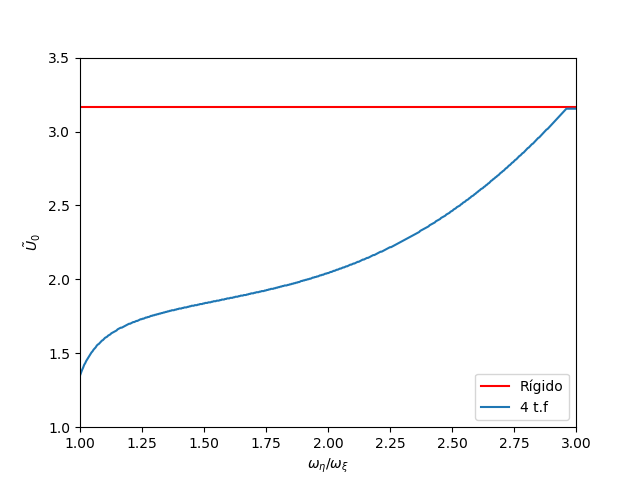

In [12]:
plt.figure()
#plt.plot(ww,velocidad3)
plt.axhline(3.16363636364,color='red',label='Rígido')
plt.plot(frecuenciaflexible,velocidadflexible,label='4 t.f')
plt.xlabel(r'$\omega_\eta/\omega_\xi$')
plt.ylabel(r'$\tilde{U}_0$')

plt.xlim(1,3)
plt.ylim(1,3.5)
plt.legend(loc='lower right')
plt.savefig('frecuenciavelocidad',dpi=300)
#plt.axvline(2)


In [31]:
velocidad=np.loadtxt('intentograficavelo')

In [107]:
ww=np.loadtxt('intentograera')

In [2]:
#velocidad

In [3]:
#ww

In [988]:
any(flameito(0,20,0,np.sqrt(1/3),1,0.21,0.451,4)[2][0].real>0)

True

In [729]:
DataFrame(flameito(0,20,0,0.5,1,0,1,0)[1])

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.159155,0.000000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.159155,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.0,-0.1,-0.016915,-0.016015,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,-0.2,0.007958,-0.000200,-0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.318310,-1.00,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
5,0.0,0.0,0.000000,0.159155,-0.00,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
6,0.0,0.0,0.000000,0.106103,-0.00,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0
7,0.0,0.0,0.000000,0.079577,-0.00,-0.0,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0
8,0.0,0.0,0.000000,0.063662,-0.00,-0.0,-0.0,-0.0,-1.0,-0.0,-0.0,-0.0
9,0.0,0.0,0.000000,0.053052,-0.00,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0,-0.0


In [712]:
alb=np.loadtxt('matrizb')

In [1158]:
#2.91818181818 1.01606060606

In [15]:
A=flameito(0,40,0,0.5,1,2,2.5,4)[0]
B=flameito(0,40,0,0.5,1,2,2.5,4)[1]
C=flameito(0,40,0,0.5,1,2,2.5,4)[2] ##########M40 RA0.5 WETA2 ,4 PARA EL CASO DE NO FLAMEO VELOCIDAD 1.85, FLAMEO : 2.5

In [318]:
flameito(0,40,0,0.5,1,2,2.1,4)[3][0]

array([ -8.15531896e+00+127.45821899j,  -8.15531896e+00-127.45821899j,
        -3.07371007e+01+109.94643785j,  -3.07371007e+01-109.94643785j,
        -2.00651799e+00 +62.72449252j,  -2.00651799e+00 -62.72449252j,
        -4.27965176e+01 +46.63599342j,  -4.27965176e+01 -46.63599342j,
        -2.36153056e+01  +0.j        ,  -1.38249108e-01 +17.33945614j,
        -1.38249108e-01 -17.33945614j,  -1.20481278e+01  +0.j        ,
         6.01953737e-03  +8.75588938j,   6.01953737e-03  -8.75588938j,
        -6.03298956e-02  +5.1053853j ,  -6.03298956e-02  -5.1053853j ,
        -6.26600467e-01  +4.71480591j,  -6.26600467e-01  -4.71480591j,
        -2.77948630e+00  +0.j        ,  -4.73800284e-01  +0.j        ])

In [14]:
def f(x,t):
    return la.solve(A, B.dot(x)+C)

In [143]:
xi2flameo2-xi2flameocurv

array([[ -1.24409828e+00,   5.75722810e-02,  -2.79416981e+00,
          5.73814442e+00,  -9.31514384e+01,   5.99181947e+01],
       [ -9.77251980e-01,  -1.32399856e-01,  -2.49873992e+00,
          3.11791861e+00,  -7.62582528e+01,   2.56871952e+01],
       [ -6.46035961e-01,  -1.91247564e-01,  -3.06272290e+00,
          2.46601629e+00,  -6.23211014e+01,   1.04926403e+01],
       ..., 
       [ -1.17747280e+34,   6.38428037e+32,   6.36190573e+34,
          1.78823636e+31,  -4.84932298e+33,  -3.47161132e+30],
       [ -1.13307112e+34,  -6.93964684e+33,   4.39798816e+34,
         -7.50754502e+32,  -3.27873323e+33,   1.31021280e+32],
       [ -3.27747302e+33,  -9.98367517e+33,  -5.48260546e+33,
         -1.02805918e+33,   5.16920203e+32,   1.79772782e+32]])

In [142]:
xi2flameocurv=np.zeros((10000,6))
for i in range(len(tt)):
    xi2flameocurv[i]=f(solcurvatura[i],tt[i])[6:12]

In [128]:
flameo2[1]

array([ -1.98229622e-04,   6.63997236e-03,   2.68257909e-05,
         3.03224585e-05,  -6.05180134e-06,  -3.15004450e-06,
        -6.38681929e-03,   1.30109206e-01,   3.20169804e-04,
         9.71531480e-04,  -1.58305012e-04,  -1.20251804e-04,
         5.25255303e-03,   3.43358439e-03,   2.49130297e-03,
         1.93231733e-03,   1.56985590e-03,   1.31871409e-03,
         1.13546712e-03,   9.61109200e-04])

In [16]:
tt=np.linspace(0,1000,10000)

In [538]:
α0=2*np.pi/180

In [40]:
eta=np.loadtxt('etanaca24xx')

In [17]:
naca=odeint(f,[0,0,-0.02586667,0.00448,-0.001152,-0.0005632,0,0,0,0,0,0,0,0,0,0,0,0,0,0],tt)

In [55]:
#flameo=np.loadtxt('flameo1')

In [18]:
flameo=np.loadtxt('flameolargo')
flameocur=np.loadtxt('flameocurvaturalargo')

In [93]:
np.savetxt('flameocurvaturalargo',solcurvatura)

<IPython.core.display.Javascript object>


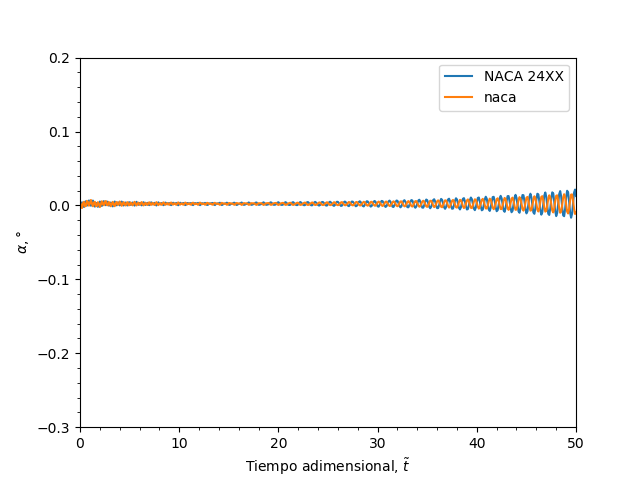

In [27]:
plt.figure()
plt.plot(tt,flameocur[:,3],label='NACA 24XX')
#plt.plot(tt,flameo[:,2],label='Placa plana')
plt.plot(tt,naca[:,3],label='naca')
plt.xlim(0,50)
plt.ylim(-0.3,0.2)
plt.legend(loc='best')
plt.xlabel('Tiempo adimensional, 'r'$\tilde{t}$')
plt.ylabel(r'$\alpha, \degree$')
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.minorticks_on()
#plt.savefig('alphacomparacion',dpi=300)

<IPython.core.display.Javascript object>


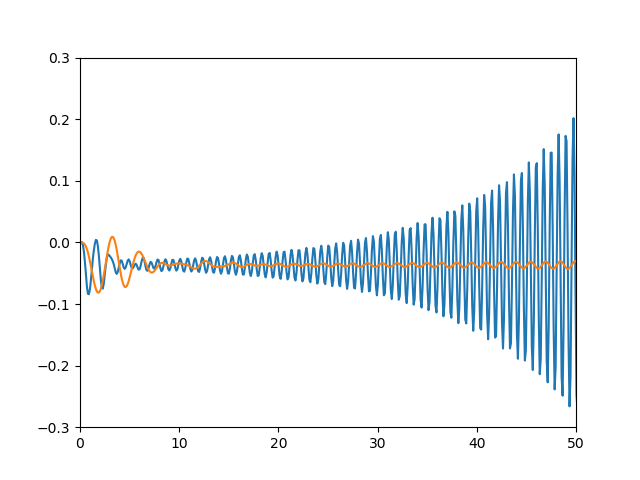

In [74]:
plt.figure()
plt.plot(tt,solcurvatura[:,0])
plt.plot(tt,flameo[:,0])
plt.xlim(0,50)
plt.ylim(-0.3,0.3)
#plt.plot(tt,sol[:,0])
#plt.legend(loc='best')
#plt.xlabel('Tiempo adimensional, 'r'$\tilde{t}$')
#plt.ylabel(r'$\alpha, \degree$')
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.minorticks_on()
#plt.xlim(0,50)
#plt.savefig('alphanoflameo',dpi=300)

In [830]:
tt.shape

In [28]:
pol2=np.zeros(10000,dtype=np.poly1d)

for i in range(10000):
    pol2[i]=legendre(2)*naca[i,2]+legendre(3)*naca[i,3]+legendre(4)*naca[i,4]+legendre(5)*naca[i,5]

In [29]:
y=np.linspace(-1,1,10000)

In [466]:
for i in range(20):
    print(tt[i*30])

0.0
3.00030003
6.00060006001
9.00090009001
12.00120012
15.00150015
18.00180018
21.00210021
24.00240024
27.00270027
30.0030003
33.00330033
36.00360036
39.00390039
42.00420042
45.00450045
48.00480048
51.0051005101
54.0054005401
57.0057005701


<IPython.core.display.Javascript object>


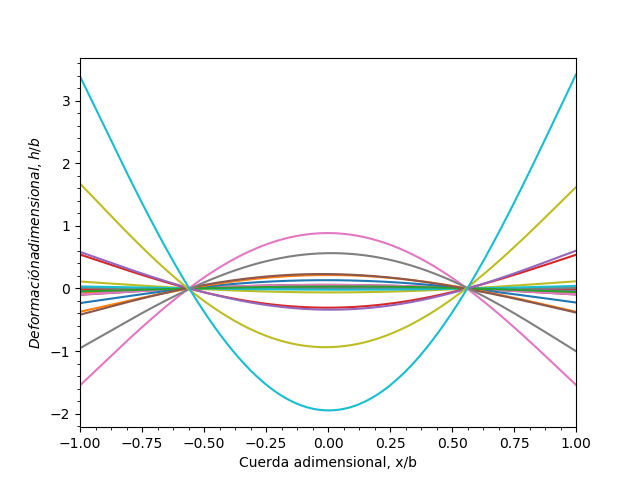

In [33]:
plt.figure()
for i in range(20):
    plt.plot(y,pol2[i*36](y))
plt.xlim(-1,1)
plt.legend(loc='best')
plt.xlabel('Cuerda adimensional, x/b')
plt.ylabel(r'$Deformación adimensional, h/b$')
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.minorticks_on()
#plt.savefig('otradeformacionflameo',dpi=300)


In [3]:
import matplotlib.animation as animation

In [7]:
fig, ax = plt.subplots()

line, = ax.plot(y, pol[0](y)+sol2[0,0]+y*sol2[0,1])
plt.xlim(-1,1)
plt.ylim(-1,1)

In [36]:
def animate(i):
    line.set_ydata(pol[i](y)+sol2[i,0]+y*sol2[i,1])  # update the data
    return line,

In [37]:
def init():
    line.set_ydata(np.ma.array(y, mask=True))
    return line,

In [30]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

In [38]:
ani = animation.FuncAnimation(fig, animate, init_func=init,interval=10, blit=True,repeat=False)
ani.save('flameo.mp4',writer=writer)


In [8]:
pol.shape

In [501]:
np.savetxt('flameo1',sol)

In [502]:
np.savetxt('noflameo1',sol1)

In [503]:
np.savetxt('flameolargo',sol2)

In [6]:
sol2=np.loadtxt('flameolargo')

In [5]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800)

In [168]:
λ00=[0.5*E(8)[2]@flameo2[i,12:] for i in range(10000)]
λ00=np.array([λ00])

In [205]:
λ000=[0.5*E(8)[2]@solcurvatura[i,12:] for i in range(10000)]
λ000=np.array([λ00])

In [34]:
flameocurv=naca

In [203]:
Lnocurv=np.pi*(xi2flameo2[:,0]+flameo2[:,7])+2*np.pi*(flameo2[:,1]+flameo2[:,6]+0.5*flameo2[:,7]-λ00)+np.pi*(-1/8*xi2flameo2[:,2]-1/64*xi2flameo2[:,4])+2*np.pi*(3/2*flameo2[:,2]+9/4*flameo2[:,3]+45/16*flameo2[:,4]+225/64*flameo2[:,5]+1/4*flameo2[:,8]+3/8*flameo2[:,9]+9/64*flameo2[:,10]+15/64*flameo2[:,11])
Lcurv=np.pi*(xi2flameocurv[:,0]+solcurvatura[:,7])+2*np.pi*(solcurvatura[:,1]+solcurvatura[:,6]+0.5*solcurvatura[:,7]-λ00)+np.pi*(-1/8*xi2flameocurv[:,2]-1/64*xi2flameocurv[:,4])+2*np.pi*(3/2*solcurvatura[:,2]+9/4*solcurvatura[:,3]+45/16*solcurvatura[:,4]+225/64*solcurvatura[:,5]+1/4*solcurvatura[:,8]+3/8*solcurvatura[:,9]+9/64*solcurvatura[:,10]+15/64*solcurvatura[:,11])

<IPython.core.display.Javascript object>


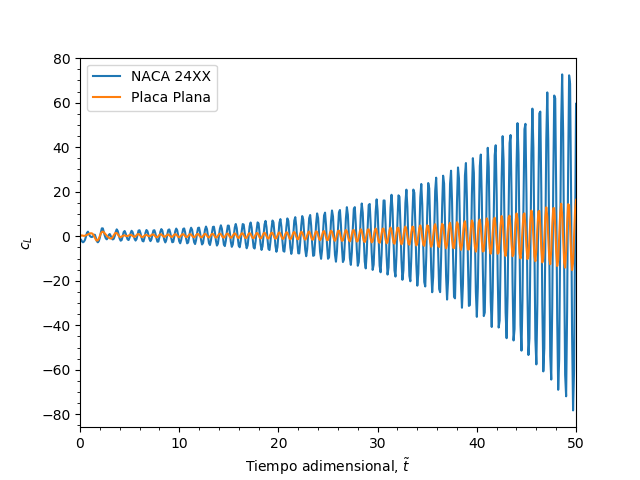

In [215]:
plt.figure()
plt.plot(tt[:501],Lcurv[0][:501],label='NACA 24XX')
plt.plot(tt[:501],Lnocurv[0][:501],label='Placa Plana')
plt.legend(loc='best')
plt.xlabel('Tiempo adimensional, 'r'$\tilde{t}$')
plt.ylabel(r'$c_L$')
plt.xlim(0,50)
plt.minorticks_on()
plt.savefig('clcomparacion',dpi=300)


In [9]:
np.loadtxt('flameocurvaturalargo')

In [35]:
np.savetxt('nacaa',naca)